In [11]:
# Importazioni
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from scipy.special import expit


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import defaultdict
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, make_scorer
from scipy.special import expit
from sklearn.model_selection import GridSearchCV, validation_curve, RandomizedSearchCV
from sklearn.decomposition import PCA

In [2]:
df_track = pd.read_csv('tracks.csv', low_memory=False)
df_track.dropna(inplace=True)  
df_track.drop_duplicates(subset='id' ,keep='first', inplace=True)
df_track

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,5,Kölsch,album,1989,...,290479,3,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,minimal-techno
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1,539229,False,45,5,Kiasmos,album,Kiasmos,...,539229,4,517.28253,0.678,0.326,0.410,0.589,1074.0,269.0,minimal-techno
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,5,Joris Delacroix,album,Night Visions,...,264200,3,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,minimal-techno
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,6,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,...,387414,4,387.41360,0.882,0.498,0.512,0.503,826.0,207.0,minimal-techno
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1,248956,False,0,1,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,248957,4,239.63574,0.882,1.000,0.474,0.459,493.0,123.0,minimal-techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109542,0wiDjWz3U1WfwXSrWHXe2b,I'm Good (Blue) - REAPER Extended Remix,1,209655,True,23,2,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],...,209655,4,200.10376,0.729,1.000,0.088,0.182,585.0,145.0,edm
109543,46n9OJc7LOIVdj8t2l5WA5,End Of The Night,1,205724,True,56,1,Danny Avila,single,End Of The Night,...,205724,4,200.98611,0.712,1.000,0.395,0.535,339.0,84.0,edm
109544,127uq83uGFapbddqiMUKky,Sexy Bitch (feat. Akon),1,195853,True,80,3,David Guetta;Akon,album,One More Love,...,195853,4,189.48643,0.814,0.990,0.097,0.330,417.0,106.0,edm
109545,0ZdUHFxifUJNqo7G4aJzoF,Savannah,1,208698,False,60,1,Diviners;Philly K.,single,Savannah,...,208698,4,197.41605,0.650,1.000,0.545,0.604,359.0,89.0,edm


In [3]:
genre_map = {
    'minimal-techno': 'Electronic',
    'hip-hop': 'Hip-Hop/Rap',
    'honky-tonk': 'Country',
    'house': 'Electronic',
    'idm': 'Electronic',
    'indian': 'World',
    'indie-pop': 'Indie',
    'indie': 'Indie',
    'industrial': 'Electronic',
    'iranian': 'World',
    'j-dance': 'Electronic',
    'j-idol': 'Pop',
    'j-pop': 'Pop',
    'j-rock': 'Rock',
    'jazz': 'Jazz',
    'k-pop': 'Pop',
    'alternative': 'Alternative',
    'ambient': 'Electronic',
    'anime': 'Pop',
    'black-metal': 'Metal',
    'bluegrass': 'Country',
    'blues': 'Blues',
    'brazil': 'World',
    'breakbeat': 'Electronic',
    'sleep': 'Ambient',
    'songwriter': 'Folk',
    'soul': 'R&B/Soul',
    'spanish': 'World',
    'study': 'Ambient',
    'swedish': 'Pop',
    'synth-pop': 'Electronic',
    'tango': 'World',
    'techno': 'Electronic',
    'trance': 'Electronic',
    'trip-hop': 'Electronic',
    'turkish': 'World',
    'world-music': 'World',
    'edm': 'Electronic',
    'electro': 'Electronic',
    'electronic': 'Electronic',
    'emo': 'Alternative',
    'folk': 'Folk',
    'forro': 'World',
    'french': 'World',
    'funk': 'Funk',
    'garage': 'Electronic',
    'german': 'World',
    'gospel': 'Gospel',
    'goth': 'Alternative',
    'grindcore': 'Metal',
    'groove': 'R&B/Soul',
    'grunge': 'Rock',
    'guitar': 'Rock',
    'acoustic': 'Folk',
    'afrobeat': 'World',
    'alt-rock': 'Rock',
    'happy': 'Pop',
    'hard-rock': 'Rock',
    'hardcore': 'Metal',
    'hardstyle': 'Electronic',
    'heavy-metal': 'Metal',
    'mandopop': 'Pop',
    'metal': 'Metal',
    'metalcore': 'Metal',
    'pop-film': 'Pop',
    'pop': 'Pop',
    'power-pop': 'Pop',
    'progressive-house': 'Electronic',
    'psych-rock': 'Rock',
    'punk-rock': 'Rock',
    'punk': 'Rock',
    'r-n-b': 'R&B/Soul',
    'reggae': 'Reggae',
    'reggaeton': 'Reggaeton',
    'rock-n-roll': 'Rock',
    'rock': 'Rock',
    'rockabilly': 'Rock',
    'romance': 'Pop',
    'sad': 'Pop',
    'salsa': 'Latino',
    'samba': 'Latino',
    'sertanejo': 'Latino',
    'show-tunes': 'Musical',
    'ska': 'Reggae',
    'mpb': 'World',
    'new-age': 'New Age',
    'kids': 'Children',
    'latin': 'Latino',
    'latino': 'Latino',
    'malay': 'World',
    'chicago-house': 'Electronic',
    'children': 'Children',
    'chill': 'Ambient',
    'classical': 'Classical',
    'club': 'Electronic',
    'comedy': 'Comedy',
    'country': 'Country',
    'opera': 'Classical',
    'pagode': 'World',
    'party': 'Pop',
    'piano': 'Classical',
    'british': 'World',
    'cantopop': 'Pop',
    'dance': 'Electronic',
    'dancehall': 'Reggae',
    'death-metal': 'Metal',
    'deep-house': 'Electronic',
    'detroit-techno': 'Electronic',
    'disco': 'Electronic',
    'disney': 'Children',
    'drum-and-bass': 'Electronic',
    'dub': 'Reggae',
    'dubstep': 'Electronic'
}

df_track['genre_cluster'] = df_track['genre'].replace(genre_map)


In [4]:
columns = ['duration_ms', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'start_of_fade_out', 
           'n_beats']
df_sub = df_track[columns]
df_sub

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,start_of_fade_out,n_beats
0,290479,52,0.532,0.517,-9.846,0.4930,0.54700,0.535000,0.0854,0.2390,186.001,275.90530,705.0
1,539229,45,0.750,0.340,-12.759,0.0326,0.16700,0.648000,0.1060,0.1450,120.016,517.28253,1074.0
2,264200,39,0.801,0.639,-10.681,0.1040,0.02900,0.466000,0.0688,0.3200,118.052,259.04180,516.0
3,387413,0,0.675,0.543,-11.983,0.0639,0.04840,0.719000,0.1120,0.0374,128.990,387.41360,826.0
4,248956,0,0.761,0.671,-13.346,0.0418,0.51300,0.917000,0.1150,0.1190,120.003,239.63574,493.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109542,209655,23,0.466,0.982,-2.674,0.0752,0.00841,0.323000,0.3580,0.3700,173.958,200.10376,585.0
109543,205724,56,0.666,0.720,-4.483,0.0269,0.37100,0.000000,0.0793,0.3120,99.970,200.98611,339.0
109544,195853,80,0.813,0.627,-5.018,0.0486,0.07710,0.000616,0.1310,0.8010,130.011,189.48643,417.0
109545,208698,60,0.653,0.779,-3.133,0.0392,0.37200,0.000001,0.0392,0.3870,108.074,197.41605,359.0


In [50]:
df = pd.read_csv('tracks.csv', low_memory=False)
df.drop(columns=['disc_number', 'name', 'track_number', 'artists', 'album_type', 'album_name', 'album_release_date', 'album_release_date_precision',
                'album_total_tracks','key','mode','features_duration_ms','time_signature', 'tempo_confidence',
                'time_signature_confidence','key_confidence','mode_confidence'], axis=1, inplace=True)

df.dropna(inplace=True)  
df.drop_duplicates(subset='id' ,keep='first', inplace=True)



df.drop(columns=['id'], axis=1, inplace=True)
df

,duration_ms,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,start_of_fade_out,n_beats,n_bars,genre
0,290479,False,52,0.532,0.517,-9.846,0.4930,0.54700,0.535000,0.0854,0.2390,186.001,275.90530,705.0,234.0,minimal-techno
1,539229,False,45,0.750,0.340,-12.759,0.0326,0.16700,0.648000,0.1060,0.1450,120.016,517.28253,1074.0,269.0,minimal-techno
2,264200,False,39,0.801,0.639,-10.681,0.1040,0.02900,0.466000,0.0688,0.3200,118.052,259.04180,516.0,171.0,minimal-techno
3,387413,False,0,0.675,0.543,-11.983,0.0639,0.04840,0.719000,0.1120,0.0374,128.990,387.41360,826.0,207.0,minimal-techno
4,248956,False,0,0.761,0.671,-13.346,0.0418,0.51300,0.917000,0.1150,0.1190,120.003,239.63574,493.0,123.0,minimal-techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109542,209655,True,23,0.466,0.982,-2.674,0.0752,0.00841,0.323000,0.3580,0.3700,173.958,200.10376,585.0,145.0,edm
109543,205724,True,56,0.666,0.720,-4.483,0.0269,0.37100,0.000000,0.0793,0.3120,99.970,200.98611,339.0,84.0,edm
109544,195853,True,80,0.813,0.627,-5.018,0.0486,0.07710,0.000616,0.1310,0.8010,130.011,189.48643,417.0,106.0,edm
109545,208698,False,60,0.653,0.779,-3.133,0.0392,0.37200,0.000001,0.0392,0.3870,108.074,197.41605,359.0,89.0,edm


In [51]:
# Applica il one-hot encoding alla colonna 'categoria'
df_encoded = pd.get_dummies(df, columns=['genre'])
pd.set_option('display.max_columns', None)
df_encoded


,duration_ms,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,start_of_fade_out,n_beats,n_bars,genre_acoustic,genre_afrobeat,genre_alt-rock,genre_alternative,genre_ambient,genre_anime,genre_black-metal,genre_bluegrass,genre_blues,genre_brazil,genre_breakbeat,genre_british,genre_cantopop,genre_chicago-house,genre_children,genre_chill,genre_classical,genre_club,genre_comedy,genre_country,genre_dance,genre_dancehall,genre_death-metal,genre_deep-house,genre_detroit-techno,genre_disco,genre_disney,genre_drum-and-bass,genre_dub,genre_dubstep,genre_edm,genre_electro,genre_electronic,genre_emo,genre_folk,genre_forro,genre_french,genre_funk,genre_garage,genre_german,genre_gospel,genre_goth,genre_grindcore,genre_groove,genre_grunge,genre_guitar,genre_happy,genre_hard-rock,genre_hardcore,genre_hardstyle,genre_heavy-metal,genre_hip-hop,genre_honky-tonk,genre_house,genre_idm,genre_indian,genre_indie,genre_indie-pop,genre_industrial,genre_iranian,genre_j-dance,genre_j-idol,genre_j-pop,genre_j-rock,genre_jazz,genre_k-pop,genre_kids,genre_latin,genre_latino,genre_malay,genre_mandopop,genre_metal,genre_metalcore,genre_minimal-techno,genre_mpb,genre_new-age,genre_opera,genre_pagode,genre_party,genre_piano,genre_pop,genre_pop-film,genre_power-pop,genre_progressive-house,genre_psych-rock,genre_punk,genre_punk-rock,genre_r-n-b,genre_reggae,genre_reggaeton,genre_rock,genre_rock-n-roll,genre_rockabilly,genre_romance,genre_sad,genre_salsa,genre_samba,genre_sertanejo,genre_show-tunes,genre_ska,genre_sleep,genre_songwriter,genre_soul,genre_spanish,genre_study,genre_swedish,genre_synth-pop,genre_tango,genre_techno,genre_trance,genre_trip-hop,genre_turkish,genre_world-music
0,290479,False,52,0.532,0.517,-9.846,0.4930,0.54700,0.535000,0.0854,0.2390,186.001,275.90530,705.0,234.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,539229,False,45,0.750,0.340,-12.759,0.0326,0.16700,0.648000,0.1060,0.1450,120.016,517.28253,1074.0,269.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,264200,False,39,0.801,0.639,-10.681,0.1040,0.02900,0.466000,0.0688,0.3200,118.052,259.04180,516.0,171.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [52]:
lista = ['duration_ms', 'explicit', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'start_of_fade_out', 'n_beats', 
         'n_bars', 'genre_minimal-techno', 'genre_pop', 'genre_disney']
for colonna in df_encoded:
    if colonna  not in lista:
        df_encoded.drop(columns=[colonna], axis=1, inplace=True)

In [53]:
df_encoded

,duration_ms,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,start_of_fade_out,n_beats,n_bars,genre_disney,genre_minimal-techno,genre_pop
0,290479,False,52,0.532,0.517,-9.846,0.4930,0.54700,0.535000,0.0854,0.2390,186.001,275.90530,705.0,234.0,False,True,False
1,539229,False,45,0.750,0.340,-12.759,0.0326,0.16700,0.648000,0.1060,0.1450,120.016,517.28253,1074.0,269.0,False,True,False
2,264200,False,39,0.801,0.639,-10.681,0.1040,0.02900,0.466000,0.0688,0.3200,118.052,259.04180,516.0,171.0,False,True,False
3,387413,False,0,0.675,0.543,-11.983,0.0639,0.04840,0.719000,0.1120,0.0374,128.990,387.41360,826.0,207.0,False,True,False
4,248956,False,0,0.761,0.671,-13.346,0.0418,0.51300,0.917000,0.1150,0.1190,120.003,239.63574,493.0,123.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109542,209655,True,23,0.466,0.982,-2.674,0.0752,0.00841,0.323000,0.3580,0.3700,173.958,200.10376,585.0,145.0,False,False,False
109543,205724,True,56,0.666,0.720,-4.483,0.0269,0.37100,0.000000,0.0793,0.3120,99.970,200.98611,339.0,84.0,False,False,False
109544,195853,True,80,0.813,0.627,-5.018,0.0486,0.07710,0.000616,0.1310,0.8010,130.011,189.48643,417.0,106.0,False,False,False
109545,208698,False,60,0.653,0.779,-3.133,0.0392,0.37200,0.000001,0.0392,0.3870,108.074,197.41605,359.0,89.0,False,False,False


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)
df_encoded


,duration_ms,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,start_of_fade_out,n_beats,n_bars,genre_disney,genre_minimal-techno,genre_pop
0,0.068559,0.0,0.547368,0.540102,0.517,0.734051,0.510881,0.549197,0.535000,0.0854,0.240201,0.764266,0.065235,0.095944,0.107834,0.0,1.0,0.0
1,0.129058,0.0,0.473684,0.761421,0.340,0.680169,0.033782,0.167671,0.648000,0.1060,0.145729,0.493138,0.124140,0.146162,0.123963,0.0,1.0,0.0
2,0.062168,0.0,0.410526,0.813198,0.639,0.718606,0.107772,0.029116,0.466000,0.0688,0.321608,0.485068,0.061120,0.070223,0.078802,0.0,1.0,0.0
3,0.092135,0.0,0.000000,0.685279,0.543,0.694523,0.066218,0.048594,0.719000,0.1120,0.037588,0.530012,0.092447,0.112412,0.095392,0.0,1.0,0.0
4,0.058460,0.0,0.000000,0.772589,0.671,0.669312,0.043316,0.515060,0.917000,0.1150,0.119598,0.493085,0.056384,0.067093,0.056682,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89557,0.048902,1.0,0.242105,0.473096,0.982,0.866711,0.077927,0.008444,0.323000,0.3580,0.371859,0.714782,0.046737,0.079614,0.066820,0.0,0.0,0.0
89558,0.047946,1.0,0.589474,0.676142,0.720,0.833250,0.027876,0.372490,0.000000,0.0793,0.313568,0.410770,0.046952,0.046135,0.038710,0.0,0.0,0.0
89559,0.045545,1.0,0.842105,0.825381,0.627,0.823354,0.050363,0.077410,0.000616,0.1310,0.805025,0.534207,0.044146,0.056750,0.048848,0.0,0.0,0.0
89560,0.048669,0.0,0.631579,0.662944,0.779,0.858221,0.040622,0.373494,0.000001,0.0392,0.388945,0.444069,0.046081,0.048857,0.041014,0.0,0.0,0.0


In [55]:
df_encoded['popularity'].value_counts() 

popularity
0.000000    12145
0.231579     1735
0.242105     1733
0.221053     1667
0.252632     1654
            ...  
0.957895        9
0.968421        6
0.989474        3
0.978947        3
1.000000        1
Name: count, Length: 96, dtype: int64

In [56]:
df_encoded['popularity'] = df_encoded['popularity'].apply(lambda x: 0 if x < 0.4 else 1)

In [57]:
df_encoded['popularity'].value_counts() 

popularity
0    54697
1    34865
Name: count, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report


X = df_encoded.drop(columns=['popularity'])
y = df_encoded['popularity']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=100)



# Creazione del modello di regressione logistica
clf = LogisticRegression()

# Addestramento del modello
clf.fit(X_train, y_train)

# Predizione sui dati di test
y_pred = clf.predict(X_test)

# Valutazione del modello
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Valutazione con Cross-Validation
cross_val_scores = cross_val_score(clf, X, y, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())


Accuracy: 0.6161375562916372
Confusion Matrix:
 [[15400   919]
 [ 9395  1155]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.94      0.75     16319
           1       0.56      0.11      0.18     10550

    accuracy                           0.62     26869
   macro avg       0.59      0.53      0.47     26869
weighted avg       0.60      0.62      0.53     26869

Cross-Validation Scores: [0.60715681 0.60782672 0.59563421 0.58240286 0.61523001]
Mean Cross-Validation Score: 0.6016501230065708


In [59]:
clf.intercept_

array([-0.79737801])

In [60]:
clf.coef_

array([[-0.01990515,  0.19091162,  1.06783939, -0.4522208 ,  0.82661255,
        -2.33965777, -0.07532096, -0.80407572,  0.10658004, -0.74158428,
         0.1606793 , -0.03537639, -0.02810964, -0.15784444, -1.2380411 ,
        -0.25717557,  0.0546097 ]])

In [61]:
from scipy.special import expit

C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


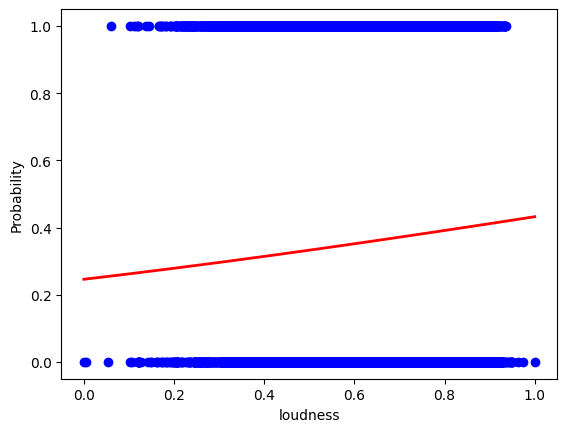

In [62]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is called df_encoded
# Step 2: Preprocess data
# Replace 'popularity' with your actual target column name
X = df_encoded.drop(columns=['popularity'])  # Features
y = df_encoded['popularity']  # Target

# Step 3: Split the data into training and testing sets (if necessary)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Plot the results for one feature
# Choose one feature to plot against
feature_index = 4  # change this to the index of the feature you want to plot
feature_name = X.columns[feature_index]

# Create a sequence of values for this feature
X_test_seq = np.linspace(X[feature_name].min(), X[feature_name].max(), 300).reshape(-1, 1)

# Create a DataFrame for plotting, setting the chosen feature to the sequence and others to their mean
X_plot = np.tile(X.mean().values, (300, 1))
X_plot[:, feature_index] = X_test_seq[:, 0]

# Predict the probabilities for these values
y_prob = model.predict_proba(X_plot)[:, 1]

# Plotting
plt.scatter(X[feature_name], y, color='blue', zorder=20)
plt.plot(X_test_seq, y_prob, color='red', linewidth=2)
plt.xlabel(feature_name)
plt.ylabel('Probability')
plt.show()



Genre: genre_minimal-techno
Accuracy: 0.992742565782128
Confusion Matrix:
 [[26674     3]
 [  192     0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     26677
         1.0       0.00      0.00      0.00       192

    accuracy                           0.99     26869
   macro avg       0.50      0.50      0.50     26869
weighted avg       0.99      0.99      0.99     26869

Cross-Validation Scores: [0.99257522 0.98972813 0.99257481 0.99251898 0.98967173]
Mean Cross-Validation Score: 0.9914137750853605


C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Genre: genre_pop
Accuracy: 0.9931147418958651
Confusion Matrix:
 [[26684     0]
 [  185     0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     26684
         1.0       0.00      0.00      0.00       185

    accuracy                           0.99     26869
   macro avg       0.50      0.50      0.50     26869
weighted avg       0.99      0.99      0.99     26869

Cross-Validation Scores: [0.99341261 0.99335678 0.99341224 0.99341224 0.99341224]
Mean Cross-Validation Score: 0.9934012196361616
Genre: genre_disney
Accuracy: 0.9896907216494846
Confusion Matrix:
 [[26592     0]
 [  277     0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     26592
         1.0       0.00      0.00      0.00       277

    accuracy                           0.99     26869
   macro avg       0.49      0.50      0.50     26869
weighted avg       0.98     

C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Cross-Validation Scores: [0.99000726 0.99000726 0.99006253 0.9900067  0.9900067 ]
Mean Cross-Validation Score: 0.9900180882702703


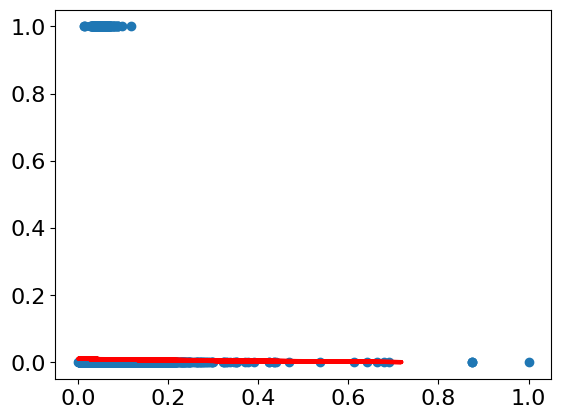

In [63]:

# Applica il one-hot encoding alla colonna 'genre'
df_encoded = pd.get_dummies(df, columns=['genre'])
pd.set_option('display.max_columns', None)

# Seleziona solo le colonne necessarie
lista = ['duration_ms', 'explicit', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'start_of_fade_out', 'n_beats', 
         'n_bars', 'genre_minimal-techno', 'genre_pop', 'genre_disney']
df_encoded = df_encoded[lista]

# Scala i dati
scaler = MinMaxScaler()
df_encoded = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Definisci X e y
X = df_encoded.drop(columns=['genre_minimal-techno', 'genre_pop', 'genre_disney'])
y = df_encoded[['genre_minimal-techno', 'genre_pop', 'genre_disney']]

# Dividi i dati in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Inizializza e addestra il modello per ogni genere
for genre in y.columns:
    clf = LogisticRegression()
    clf.fit(X_train, y_train[genre])

    # Predici i valori di test
    y_pred = clf.predict(X_test)
    
    # Valuta il modello
    accuracy = accuracy_score(y_test[genre], y_pred)
    conf_matrix = confusion_matrix(y_test[genre], y_pred)
    class_report = classification_report(y_test[genre], y_pred)

    print(f"Genre: {genre}")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    
    # Cross-Validation
    cross_val_scores = cross_val_score(clf, X, y[genre], cv=5)
    print("Cross-Validation Scores:", cross_val_scores)
    print("Mean Cross-Validation Score:", cross_val_scores.mean())

# Plotting di un grafico di esempio
X_test_column = X_test.iloc[:, 0] if isinstance(X_test, pd.DataFrame) else X_test
X_test_reshaped = np.sort(X_test_column.values.reshape(-1, 1))
loss = expit(X_test_reshaped * clf.coef_[0, 0] + clf.intercept_).ravel()

plt.plot(X_test_reshaped, loss, color='red', linewidth=3)
plt.scatter(X_train.iloc[:, 0], y_train['genre_pop'])  # Assuming you want to plot genre_pop
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accuracy: 0.6161375562916372
Confusion Matrix:
 [[15400   919]
 [ 9395  1155]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.94      0.75     16319
           1       0.56      0.11      0.18     10550

    accuracy                           0.62     26869
   macro avg       0.59      0.53      0.47     26869
weighted avg       0.60      0.62      0.53     26869

Cross-Validation Scores: [0.60715681 0.60782672 0.59563421 0.58240286 0.61523001]
Mean Cross-Validation Score: 0.6016501230065708


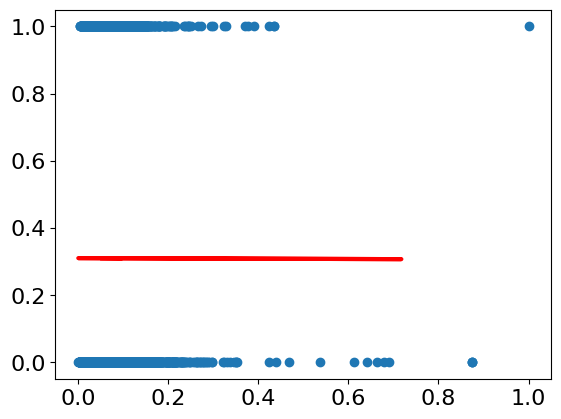

In [64]:
# Importazioni
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from scipy.special import expit

# Importa il dataset
df = pd.read_csv('tracks.csv', low_memory=False)

# Rimuovi le colonne inutili
df.drop(columns=['disc_number', 'name', 'track_number', 'artists', 'album_type', 'album_name', 'album_release_date', 'album_release_date_precision',
                'album_total_tracks', 'key', 'mode', 'features_duration_ms', 'time_signature', 'tempo_confidence',
                'time_signature_confidence', 'key_confidence', 'mode_confidence'], axis=1, inplace=True)

# Rimuovi i valori mancanti e i duplicati
df.dropna(inplace=True)
df.drop_duplicates(subset='id', keep='first', inplace=True)
df.drop(columns=['id'], axis=1, inplace=True)

# Applica il one-hot encoding alla colonna 'genre'
df_encoded = pd.get_dummies(df, columns=['genre'])
pd.set_option('display.max_columns', None)

# Seleziona solo le colonne necessarie
lista = ['duration_ms', 'explicit', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'start_of_fade_out', 'n_beats', 
         'n_bars', 'genre_minimal-techno', 'genre_pop', 'genre_disney']
df_encoded = df_encoded[lista]

# Scala i dati
scaler = MinMaxScaler()
df_encoded = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Binarizza la popolarità
df_encoded['popularity'] = df_encoded['popularity'].apply(lambda x: 0 if x < 0.4 else 1)

# Definisci X e y
X = df_encoded.drop(columns=['popularity'])
y = df_encoded['popularity']

# Dividi i dati in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Creazione del modello di regressione logistica
clf = LogisticRegression()

# Addestramento del modello
clf.fit(X_train, y_train)

# Predizione sui dati di test
y_pred = clf.predict(X_test)

# Valutazione del modello
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Valutazione con Cross-Validation
cross_val_scores = cross_val_score(clf, X, y, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

# Plotting di un grafico di esempio
X_test_column = X_test.iloc[:, 0] if isinstance(X_test, pd.DataFrame) else X_test
X_test_reshaped = np.sort(X_test_column.values.reshape(-1, 1))
loss = expit(X_test_reshaped * clf.coef_[0, 0] + clf.intercept_).ravel()

plt.plot(X_test_reshaped, loss, color='red', linewidth=3)
plt.scatter(X_train.iloc[:, 0], y_train)  # Assumendo che X_train sia un DataFrame, accedendo alla sua prima colonna
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


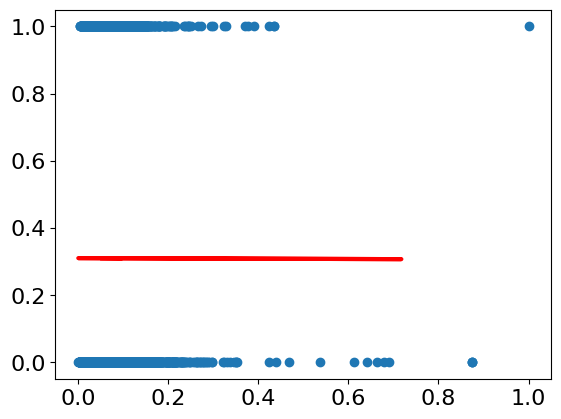

In [65]:
X_test_column = X_test.iloc[:, 0] if isinstance(X_test, pd.DataFrame) else X_test
X_test_reshaped = np.sort(X_test_column.values.reshape(-1, 1))
loss = expit(X_test_reshaped * clf.coef_[0, 0] + clf.intercept_).ravel()

plt.plot(X_test_reshaped, loss, color='red', linewidth=3)
plt.scatter(X_train.iloc[:, 0], y_train)  # Assumendo che X_train sia un DataFrame, accedendo alla sua prima colonna
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


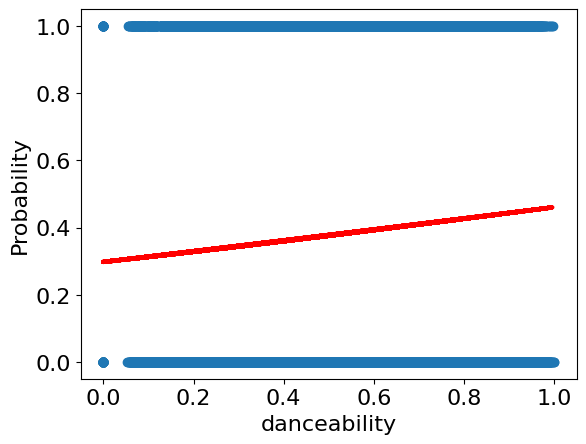

In [66]:
# Seleziona la nuova feature (esempio: danceability)
new_feature = 'danceability'

# Modifica X_train e X_test per includere solo la nuova feature
X_train_new = X_train[[new_feature]]
X_test_new = X_test[[new_feature]]

# Addestramento del modello su X_train_new
clf.fit(X_train_new, y_train)

# Calcolo della funzione logistica per la nuova feature
X_test_column_new = X_test_new.iloc[:, 0] if isinstance(X_test_new, pd.DataFrame) else X_test_new
X_test_reshaped_new = np.sort(X_test_column_new.values.reshape(-1, 1))
loss_new = expit(X_test_reshaped_new * clf.coef_[0, 0] + clf.intercept_).ravel()

# Plotting della nuova curva logistica
plt.plot(X_test_reshaped_new, loss_new, color='red', linewidth=3)
plt.scatter(X_train_new.iloc[:, 0], y_train)  # Assumendo che X_train_new sia un DataFrame, accedendo alla sua prima colonna
plt.xlabel(new_feature, fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


ValueError: x and y must be the same size

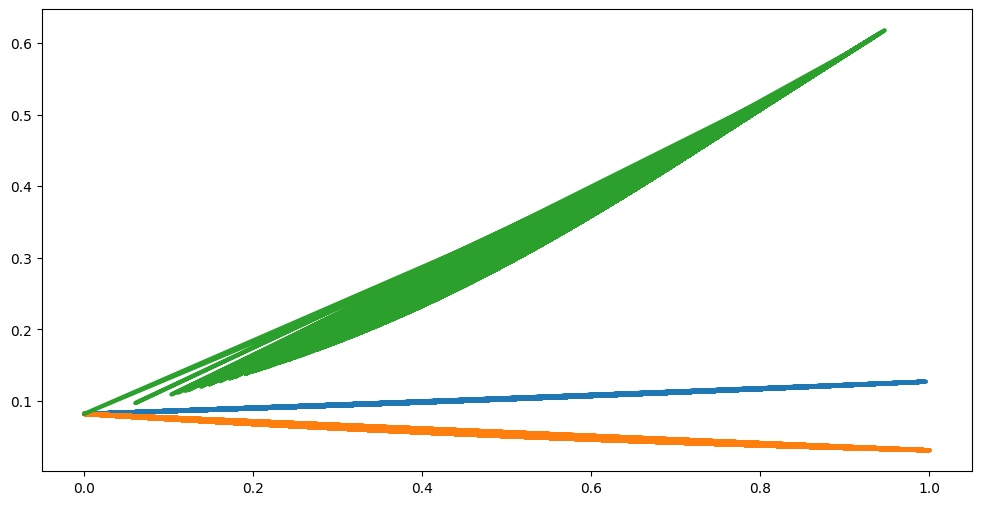

In [67]:
# Seleziona le nuove feature di interesse
new_features = ['danceability', 'energy', 'loudness']

# Modifica X_train e X_test per includere solo le nuove feature
X_train_new = X_train[new_features]
X_test_new = X_test[new_features]

# Addestramento del modello su X_train_new
clf.fit(X_train_new, y_train)

# Calcolo della funzione logistica per le nuove feature
plt.figure(figsize=(12, 6))
for feature in new_features:
    X_test_column_new = X_test_new[feature].values.reshape(-1, 1)
    X_test_reshaped_new = np.sort(X_test_column_new)
    loss_new = expit(X_test_reshaped_new * clf.coef_[0, new_features.index(feature)] + clf.intercept_).ravel()

    plt.plot(X_test_reshaped_new, loss_new, label=f'{feature}', linewidth=3)

plt.scatter(X_train_new.values, y_train, alpha=0.2)  # Assumendo che X_train_new sia un DataFrame, accedendo alle sue colonne
plt.xlabel('Feature Value', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


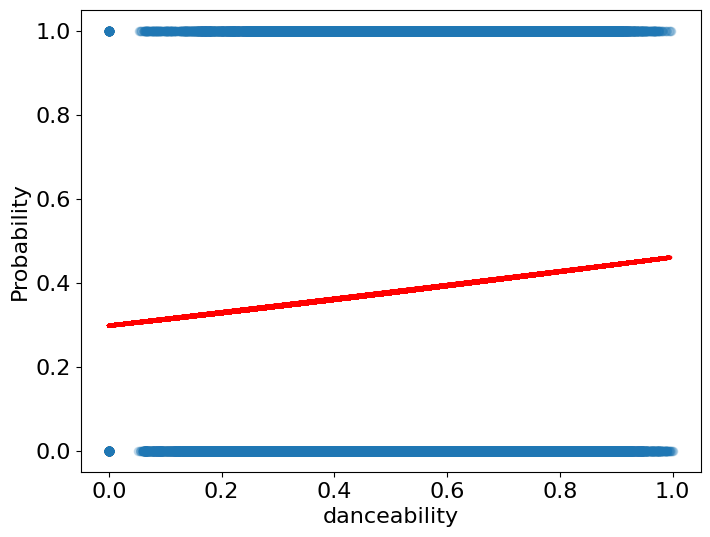

In [ ]:
# Seleziona la nuova feature di interesse
new_feature = 'danceability'

# Modifica X_train e X_test per includere solo la nuova feature
X_train_new = X_train[[new_feature]]
X_test_new = X_test[[new_feature]]

# Addestramento del modello su X_train_new
clf.fit(X_train_new, y_train)

# Calcolo della funzione logistica per la nuova feature
X_test_column_new = X_test_new[new_feature].values.reshape(-1, 1)
X_test_reshaped_new = np.sort(X_test_column_new)
loss_new = expit(X_test_reshaped_new * clf.coef_[0, 0] + clf.intercept_).ravel()

# Plotting della curva logistica
plt.figure(figsize=(8, 6))
plt.plot(X_test_reshaped_new, loss_new, color='red', linewidth=3)
plt.scatter(X_train_new[new_feature], y_train, alpha=0.2)  # Accedi correttamente alla feature
plt.xlabel(new_feature, fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


ValueError: x and y must be the same size

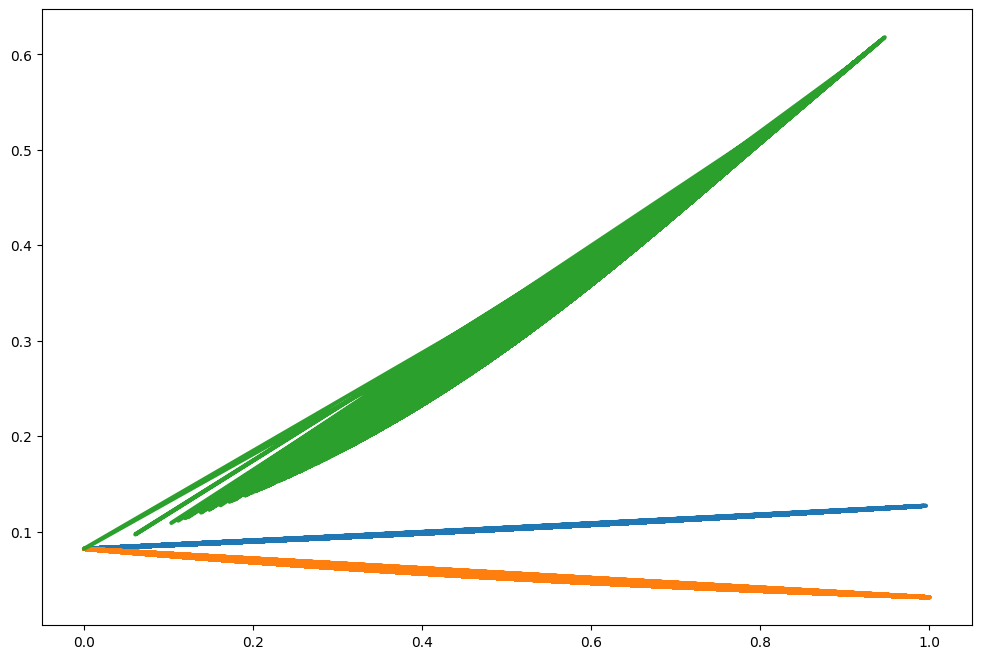

In [ ]:
# Seleziona le nuove feature di interesse
new_features = ['danceability', 'energy', 'loudness']

# Modifica X_train e X_test per includere solo le nuove feature
X_train_new = X_train[new_features]
X_test_new = X_test[new_features]

# Addestramento del modello su X_train_new
clf.fit(X_train_new, y_train)

# Plotting delle curve logistiche per le nuove feature
plt.figure(figsize=(12, 8))

for feature in new_features:
    # Calcolo della funzione logistica per la feature corrente
    X_test_column_new = X_test_new[feature].values.reshape(-1, 1)
    X_test_reshaped_new = np.sort(X_test_column_new)
    loss_new = expit(X_test_reshaped_new * clf.coef_[0, new_features.index(feature)] + clf.intercept_).ravel()
    
    # Plot della curva logistica
    plt.plot(X_test_reshaped_new, loss_new, label=f'{feature}', linewidth=3)

# Scatter plot dei dati di addestramento
plt.scatter(X_train_new.values, y_train, alpha=0.2)
plt.xlabel('Feature Value', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


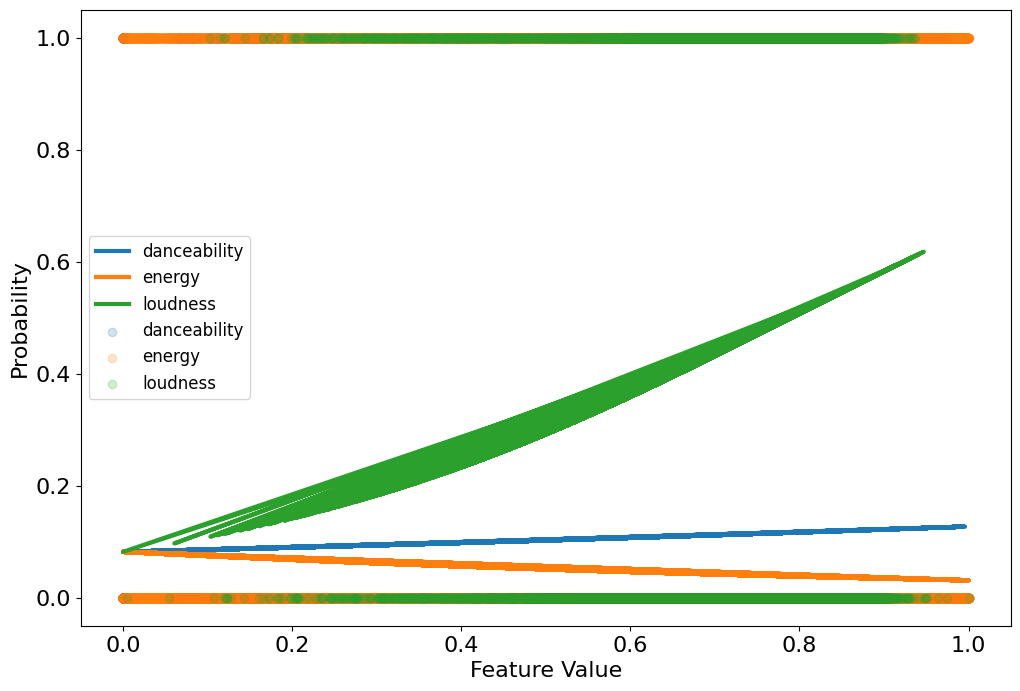

In [ ]:
# Seleziona le nuove feature di interesse
new_features = ['danceability', 'energy', 'loudness']

# Modifica X_train e X_test per includere solo le nuove feature
X_train_new = X_train[new_features]
X_test_new = X_test[new_features]

# Addestramento del modello su X_train_new
clf.fit(X_train_new, y_train)

# Plotting delle curve logistiche per le nuove feature
plt.figure(figsize=(12, 8))

for feature in new_features:
    # Calcolo della funzione logistica per la feature corrente
    X_test_column_new = X_test_new[feature].values.reshape(-1, 1)
    X_test_reshaped_new = np.sort(X_test_column_new)
    loss_new = expit(X_test_reshaped_new * clf.coef_[0, new_features.index(feature)] + clf.intercept_).ravel()
    
    # Plot della curva logistica
    plt.plot(X_test_reshaped_new, loss_new, label=f'{feature}', linewidth=3)

# Scatter plot dei dati di addestramento per ciascuna feature
for feature in new_features:
    plt.scatter(X_train_new[feature], y_train, alpha=0.2, label=f'{feature}')

plt.xlabel('Feature Value', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


In [ ]:
df_encoded

,duration_ms,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,start_of_fade_out,n_beats,n_bars,genre_acoustic,genre_afrobeat,genre_alt-rock,genre_alternative,genre_ambient,genre_anime,genre_black-metal,genre_bluegrass,genre_blues,genre_brazil,genre_breakbeat,genre_british,genre_cantopop,genre_chicago-house,genre_children,genre_chill,genre_classical,genre_club,genre_comedy,genre_country,genre_dance,genre_dancehall,genre_death-metal,genre_deep-house,genre_detroit-techno,genre_disco,genre_disney,genre_drum-and-bass,genre_dub,genre_dubstep,genre_edm,genre_electro,genre_electronic,genre_emo,genre_folk,genre_forro,genre_french,genre_funk,genre_garage,genre_german,genre_gospel,genre_goth,genre_grindcore,genre_groove,genre_grunge,genre_guitar,genre_happy,genre_hard-rock,genre_hardcore,genre_hardstyle,genre_heavy-metal,genre_hip-hop,genre_honky-tonk,genre_house,genre_idm,genre_indian,genre_indie,genre_indie-pop,genre_industrial,genre_iranian,genre_j-dance,genre_j-idol,genre_j-pop,genre_j-rock,genre_jazz,genre_k-pop,genre_kids,genre_latin,genre_latino,genre_malay,genre_mandopop,genre_metal,genre_metalcore,genre_minimal-techno,genre_mpb,genre_new-age,genre_opera,genre_pagode,genre_party,genre_piano,genre_pop,genre_pop-film,genre_power-pop,genre_progressive-house,genre_psych-rock,genre_punk,genre_punk-rock,genre_r-n-b,genre_reggae,genre_reggaeton,genre_rock,genre_rock-n-roll,genre_rockabilly,genre_romance,genre_sad,genre_salsa,genre_samba,genre_sertanejo,genre_show-tunes,genre_singer-songwriter,genre_ska,genre_sleep,genre_songwriter,genre_soul,genre_spanish,genre_study,genre_swedish,genre_synth-pop,genre_tango,genre_techno,genre_trance,genre_trip-hop,genre_turkish,genre_world-music
0,0.642668,False,0.891541,-0.192800,-0.480768,-0.300169,3.829359,0.679144,1.212004,-0.673354,-0.909238,186.001,0.581700,1.105212,1.960127,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,3.190908,False,0.586440,1.060547,-1.180537,-0.874520,-0.489070,-0.457285,1.575005,-0.565987,-1.271152,120.016,3.091499,2.747758,2.546316,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.373461,False,0.324925,1.353761,0.001559,-0.464805,0.180643,-0.869988,0.990349,-0.759873,-0.597376,118.052,0.406356,0.263908,0.904986,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,F

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Addestramento del modello di regressione lineare
regressor = LinearRegression()
regressor.fit(X_train_new, y_train)

# Predizione sui dati di test
y_pred = regressor.predict(X_test_new)

# Valutazione del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.9754490697556507
R-squared: 0.024388245597782188
